In [9]:
% load_ext autoreload
% autoreload 2
from algorithms.GMM import GMM
import datetime

start_time = datetime.datetime(2018, 2, 7)
end_time = datetime.datetime(2018, 2, 8)

gmm = GMM(start_time, end_time, 'cvw', n_clusters=30)
#gmm.pickle()
print(gmm.data_dict.keys())
print(gmm.runtime)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
dict_keys(['gate', 'time', 'vel', 'trad_gsflg', 'beam', 'wid', 'elv', 'nbeam', 'nrang'])


In [10]:
print(gmm.runtime)

355.10222911834717


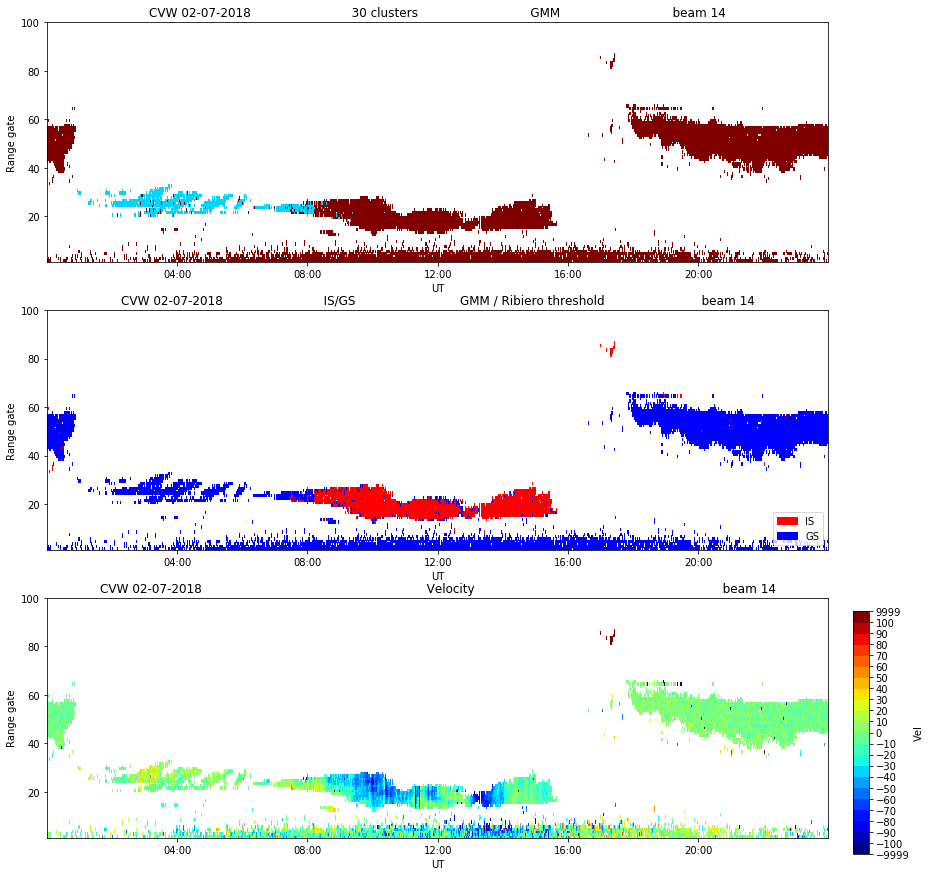

In [11]:
%matplotlib inline
gmm.plot_rti(14, 'Ribiero')

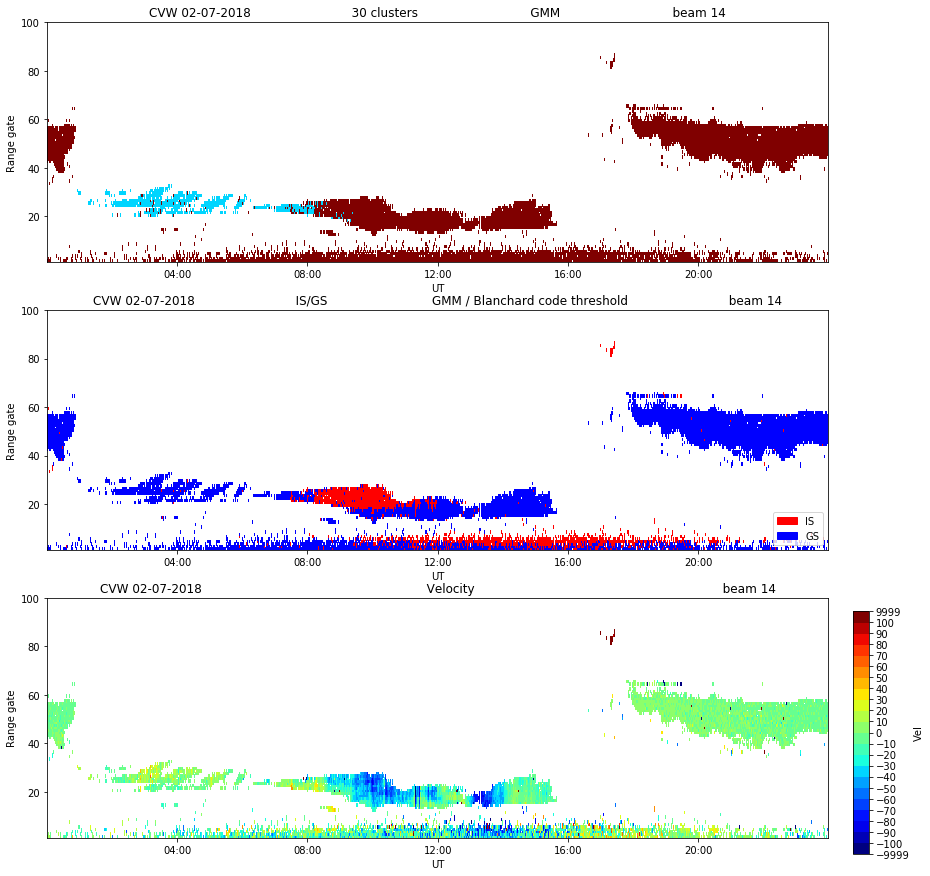

In [12]:
gmm.plot_rti(14, 'Blanchard code')